In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_excel("about_us.xlsx")

In [3]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the DF series
dataset['cleaned'] = dataset['about'].apply(remove_punctuations)


In [4]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import re
import nltk
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = list(en.Defaults.stop_words)


list_filtered = ["food","best","better","best","make","supplement",'product','products','people','like','shelp']
for i in list_filtered:
    stopwords.append(i)

stopwords = set(stopwords)



def preprocess_text(text: str, remove_stopwords: bool) -> str:
 
    
    
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords]
        
        # 3. join back together
        text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in tokens])
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [5]:
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [6]:

dataset["cleaned"]

0     wondered rely harmful chemical artificial ingr...
1     weve reached radical tipping point history dev...
2     carla oates created beauty chef healing family...
3     sick poor diet lifestyle choice created superf...
4     matter journey want help help moon juice born ...
                            ...                        
87    thoughtful highquality cbd inspired plant desi...
88    believed coveted skincare kind environment goo...
89    wake check phone work sit screen lunch break c...
90    functional lifestyle s living way cultivates i...
91    created key goal mind ditch shaker sick tired ...
Name: cleaned, Length: 92, dtype: object

In [7]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import CountVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features
vectorizer = CountVectorizer()
X  = vectorizer.fit_transform(dataset["cleaned"])

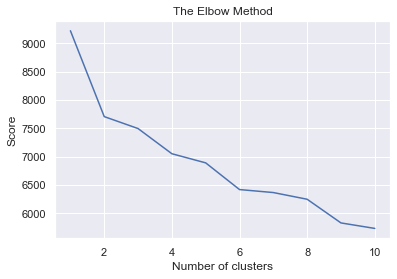

In [8]:
k_clusters = 10
from sklearn.cluster import KMeans

score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [9]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [10]:
clusters = kmeans.predict(X)
# Create a new column to display the predicted result
dataset["ClusterName"] = clusters

In [11]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [12]:
dataset['cluster'] = clusters
dataset['x0'] = x0
dataset['x1'] = x1

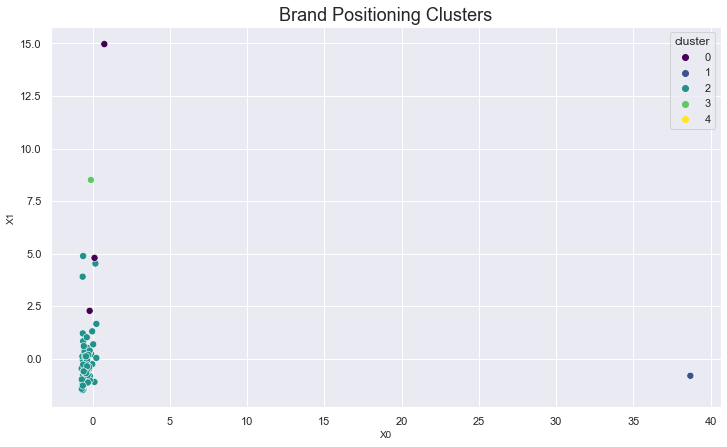

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
# set a title
plt.title("Brand Positioning Clusters", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 10})
plt.ylabel("X1", fontdict={"fontsize": 10})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=dataset, x='x0', y='x1', hue='cluster', palette="viridis", s=50)
plt.show()

In [14]:
data_list=[]
data0=dataset[dataset['cluster']==0]['about']
data1=dataset[dataset['cluster']==1]['about']
data2=dataset[dataset['cluster']==2]['about']
data3=dataset[dataset['cluster']==3]['about']
data4=dataset[dataset['cluster']==4]['about']
data_list.append(data0)
data_list.append(data1)
data_list.append(data2)
data_list.append(data3)
data_list.append(data4)

In [15]:
def wordclouding(list):
    comment_words = ''
    
    for val in list:
	
	
        val = str(val)

        # split the value
        tokens = val.split()
	
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
	
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

    # plot the WordCloud image					
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

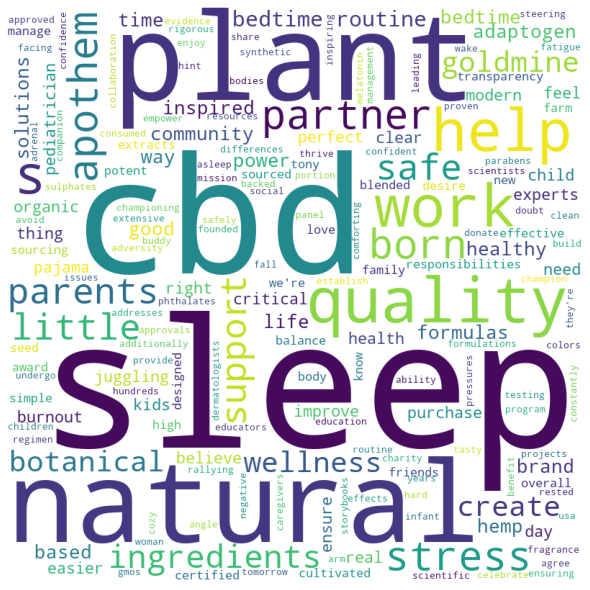

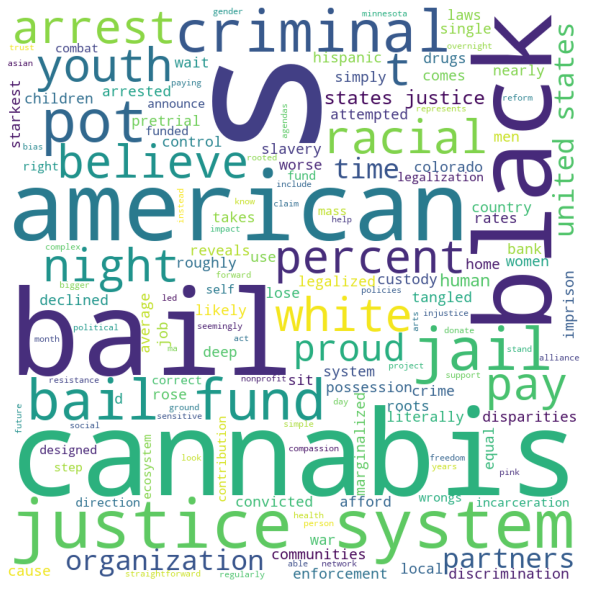

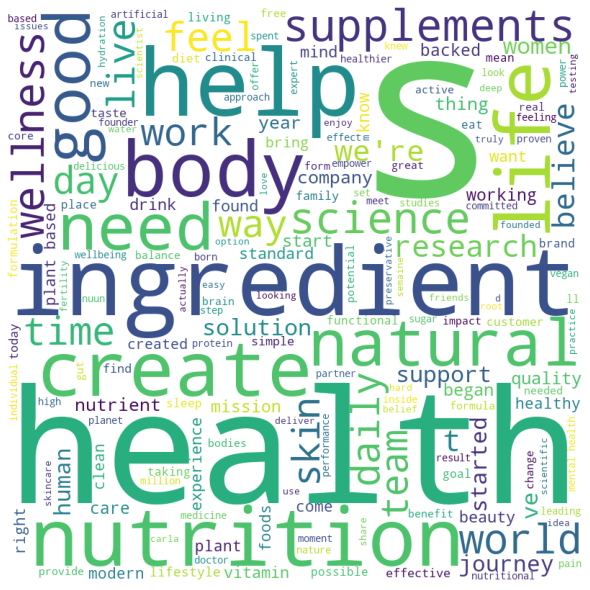

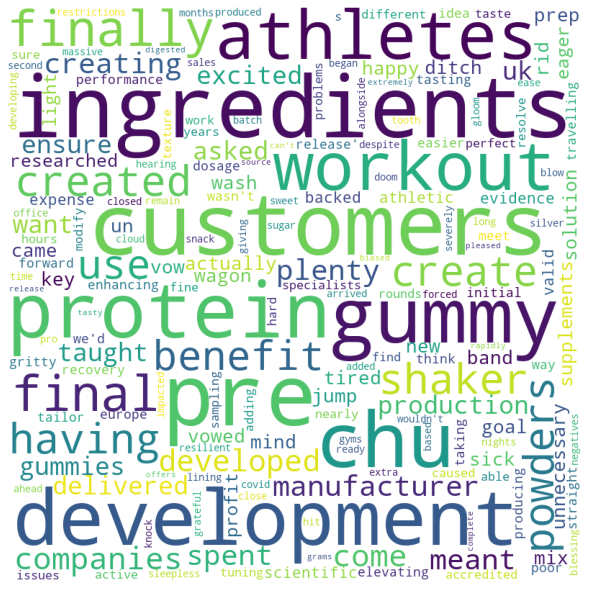

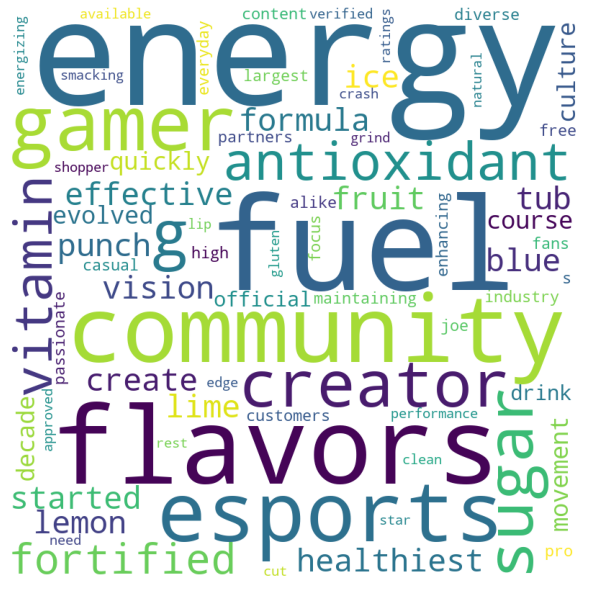

In [16]:
for i in data_list:
    wordclouding(i)

In [17]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import CountVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features
vectorizer = CountVectorizer()
data=pd.DataFrame()
data['cleaned'] = dataset[dataset['cluster']==2]['cleaned']
X  = vectorizer.fit_transform(data['cleaned'])

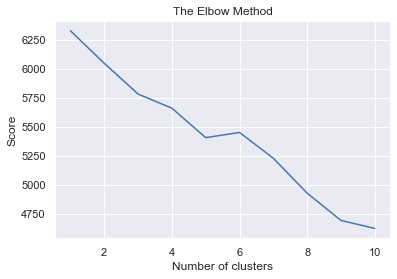

In [18]:
k_clusters = 10
from sklearn.cluster import KMeans



score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [85]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [86]:
clusters = kmeans.predict(X)
# Create a new column to display the predicted result
data["ClusterName"] = clusters

In [124]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]


In [125]:
data['cluster'] = clusters
data['x0'] = x0
data['x1'] = x1


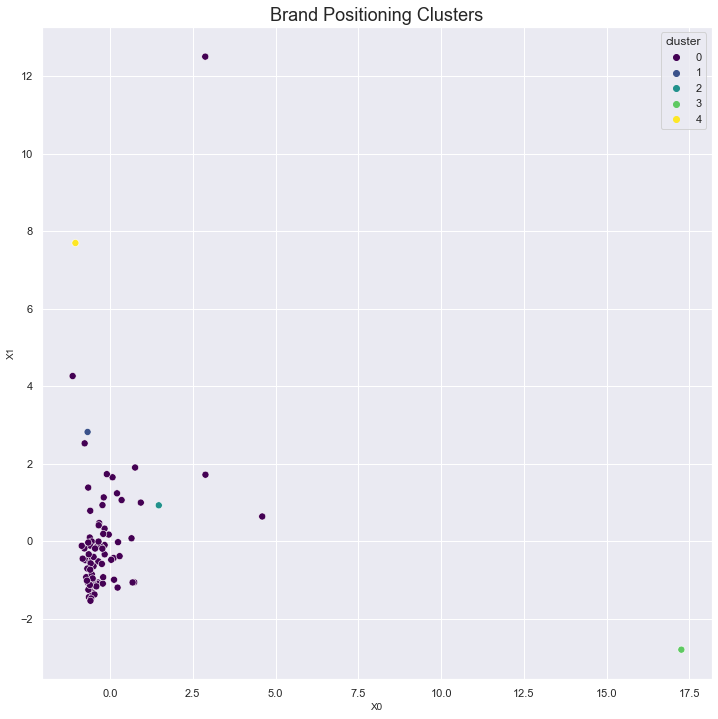

In [128]:
plt.figure(figsize=(12, 12))
# set a title
plt.title("Brand Positioning Clusters", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 10})
plt.ylabel("X1", fontdict={"fontsize": 10})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=data, x='x0', y='x1', hue='cluster', palette="viridis", s=50)
plt.show()

In [129]:
en = spacy.load('en_core_web_sm')
stopwords = list(en.Defaults.stop_words)

list_filtered = ["food","best","better","best","make","supplement",'product','products','people','like','shelp','health','thing']
for i in list_filtered:
    stopwords.append(i)

stopwords = set(stopwords)

In [130]:
data_list=[]
data0=data[data['cluster']==0]['cleaned']
data1=data[data['cluster']==1]['cleaned']
data2=data[data['cluster']==2]['cleaned']
data3=data[data['cluster']==3]['cleaned']
data4=data[data['cluster']==4]['cleaned']
data_list.append(data0)
data_list.append(data1)
data_list.append(data2)
data_list.append(data3)
data_list.append(data4)

In [131]:

def wordclouding(list):
    comment_words = ''
    
    for val in list:
	
	
        val = str(val)

        # split the value
        tokens = val.split()
	
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
	
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
                max_words = 100,
				min_font_size = 10).generate(comment_words)

    # plot the WordCloud image					
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

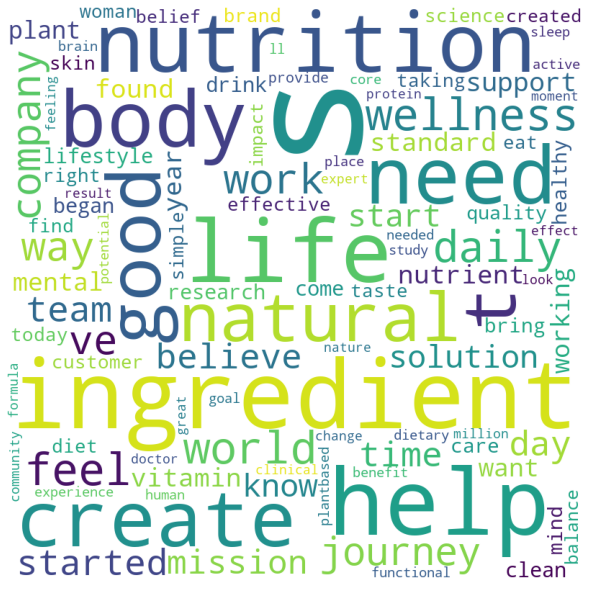

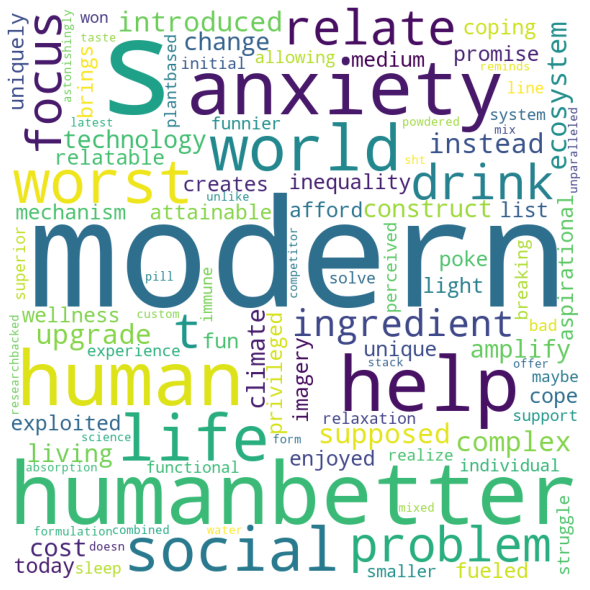

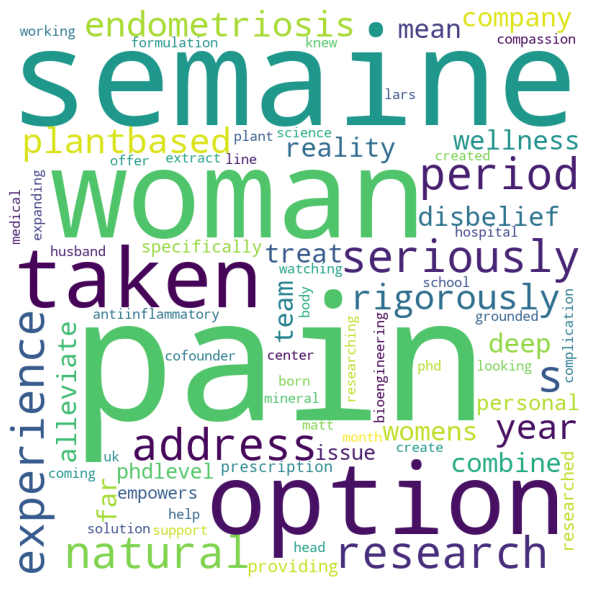

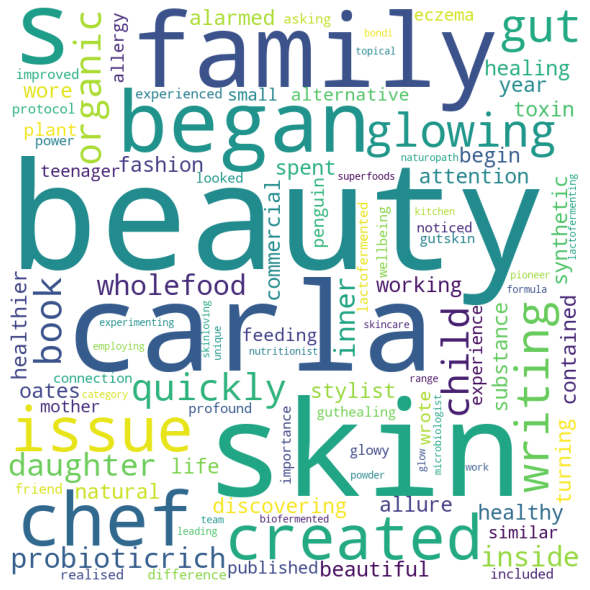

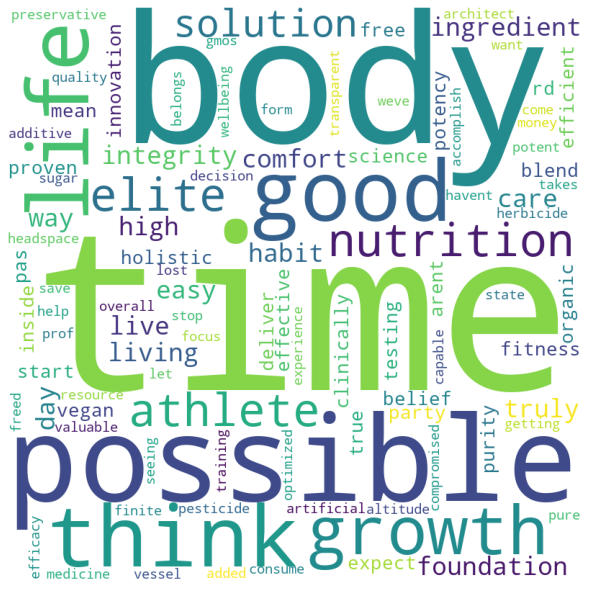

In [132]:
for i in data_list:
    wordclouding(i)

In [ ]:
cleaned_data = ["I would like to change my mortgage debit order",
                "Please send me my latest credit card statement",
                "I would like to apply for a student loan"]
cleaned_data = pd.DataFrame(cleaned_data, columns=["ConsumerComplaints"])
cleaned_data = cleaned_data["ConsumerComplaints"].apply(clean_text)
predicted = model.predict(vectorizer.transform(cleaned_data))
predicted
# array([6, 1, 0], dtype=int32)